In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('ubicaciones.csv')
X = df[['lat','lon']].copy()

In [3]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
sc = MinMaxScaler()
Xmm = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
varc = ['lat','lon']
pca = PCA()
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=['p%d'%(i+1) for i in range(len(varc))])

In [5]:
c=[[0.63720143, 0.82455002],
       [0.296622  , 0.53611729],
       [0.23256144, 0.76633095],
       [0.26450912, 0.19195371],
       [0.60839053, 0.60644461],
       [0.50142289, 0.38510475]]
k=6
s=300
gmm = GaussianMixture(n_components=k,weights_init=[1/6,1/6,1/6,1/6,1/6,1/6],
                      means_init=c)

In [6]:
m0=[]
m1=[]
m2=[]
m3=[]
m4=[]
m5=[]
for j in range(s):
    gmm.fit(Xmm)
    m0.append(gmm.means_[0])
    m1.append(gmm.means_[1])
    m2.append(gmm.means_[2])
    m3.append(gmm.means_[3])
    m4.append(gmm.means_[4])
    m5.append(gmm.means_[5])

In [7]:
c=[]
x=sum(m0[j][0] for j in range(s))/s
y=sum(m0[j][1] for j in range(s))/s
c.append([x,y])
x=sum(m1[j][0] for j in range(s))/s
y=sum(m1[j][1] for j in range(s))/s
c.append([x,y])
x=sum(m2[j][0] for j in range(s))/s
y=sum(m2[j][1] for j in range(s))/s
c.append([x,y])
x=sum(m3[j][0] for j in range(s))/s
y=sum(m3[j][1] for j in range(s))/s
c.append([x,y])
x=sum(m4[j][0] for j in range(s))/s
y=sum(m4[j][1] for j in range(s))/s
c.append([x,y])
x=sum(m5[j][0] for j in range(s))/s
y=sum(m5[j][1] for j in range(s))/s
c.append([x,y])
c

[[0.638409794185732, 0.8247022158463942],
 [0.2959536999780324, 0.5399578657334161],
 [0.23408192163887065, 0.7699234828373893],
 [0.2626108477105926, 0.1892378822802687],
 [0.6073681993157373, 0.6126511776474733],
 [0.5019630605560317, 0.38831360200190734]]

In [8]:
gmm = GaussianMixture(n_components=k,weights_init=[1/6,1/6,1/6,1/6,1/6,1/6],
                      means_init=c)
gmm.fit(Xmm)

GaussianMixture(means_init=array([[0.63840979, 0.82470222],
       [0.2959537 , 0.53995787],
       [0.23408192, 0.76992348],
       [0.26261085, 0.18923788],
       [0.6073682 , 0.61265118],
       [0.50196306, 0.3883136 ]]),
                n_components=6,
                weights_init=array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667]))

In [9]:
gmm.means_

array([[0.63943793, 0.82325905],
       [0.30363706, 0.54179737],
       [0.24090744, 0.77061238],
       [0.25956964, 0.18623372],
       [0.61326587, 0.61447909],
       [0.50593402, 0.3865372 ]])

In [10]:
gmm.covariances_

array([[[ 0.00949096,  0.00247882],
        [ 0.00247882,  0.00384003]],

       [[ 0.01052791,  0.00229916],
        [ 0.00229916,  0.00987447]],

       [[ 0.0141117 ,  0.00584909],
        [ 0.00584909,  0.00748477]],

       [[ 0.0128352 , -0.00017912],
        [-0.00017912,  0.00772657]],

       [[ 0.01240892, -0.00326189],
        [-0.00326189,  0.00789585]],

       [[ 0.01362356,  0.00181359],
        [ 0.00181359,  0.0073575 ]]])

In [11]:
gmm.weights_

array([0.18901525, 0.18968012, 0.17872984, 0.14925344, 0.15179559,
       0.14152576])

In [12]:
gmm.n_iter_

6

In [13]:
df['cl'] = X['cl'] = Xp['cl'] = Xs['cl']=gmm.predict(Xmm)

In [14]:
pd.DataFrame(gmm.predict_proba(Xmm))

,0,1,2,3,4,5
0,5.161306e-08,0.462186,2.312442e-07,4.520258e-03,9.410428e-03,5.238832e-01
1,4.689895e-11,0.872973,1.836511e-04,1.081401e-01,1.684315e-07,1.870354e-02
2,1.079878e-15,0.002156,5.445559e-16,1.480745e-02,1.835113e-03,9.812016e-01
3,1.139795e-06,0.951885,1.702827e-04,1.080531e-03,1.594024e-03,4.526853e-02
4,1.046769e-10,0.009075,1.844037e-12,8.596177e-04,4.841734e-02,9.416482e-01
...,...,...,...,...,...,...
3620,9.507218e-01,0.000128,1.767878e-05,2.055718e-14,4.911824e-02,1.435533e-05
3621,7.301415e-01,0.004088,2.999139e-04,8.488498e-12,2.653350e-01,1.358660e-04
3622,4.803247e-02,0.005828,9.295690e-01,5.311775e-15,1.657025e-02,1.256849e-08
3623,4.842133e-01,0.105543,1.477608e-01,1.885343e-10,2.624292e-01,5.406929e-05


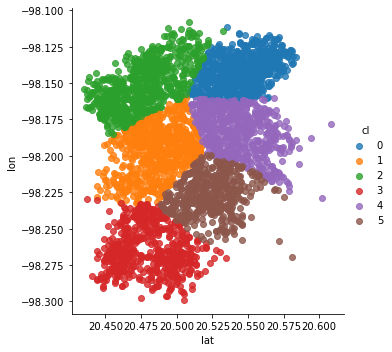

In [15]:
sns.lmplot(data=df,x='lat',y='lon',fit_reg=False,hue='cl')

In [16]:
df.cl.value_counts()

0    698
1    688
2    649
4    565
3    550
5    475
Name: cl, dtype: int64

In [17]:
df[['Vol_Entrega','cl']].groupby('cl').sum()

,Vol_Entrega
cl,
0,7947.500000
1,11080.166667
2,8877.833333
3,7547.666667
4,6915.500000
5,5465.833333


In [18]:
df['cl'] = X['cl'] = Xp['cl'] = Xs['cl'] = Xmm['cl']=gmm.predict(Xmm)
Xmm['Vol_Entrega']=df['Vol_Entrega']
Xmm['Id_Cliente']=df['Id_Cliente']
Xmm['Frecuencia']=df['Frecuencia']
c=gmm.means_
c

array([[0.63943793, 0.82325905],
       [0.30363706, 0.54179737],
       [0.24090744, 0.77061238],
       [0.25956964, 0.18623372],
       [0.61326587, 0.61447909],
       [0.50593402, 0.3865372 ]])

In [19]:
centroids = {i+1:c[i] for i in range(k)}
df=Xmm

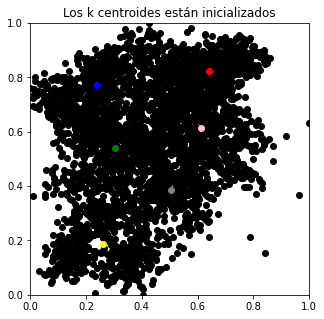

In [20]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['lat'], df['lon'], color='k')
colmap = {1: 'red', 2: 'green', 3: 'blue',4:'yellow',5:'pink',6:'grey'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Los k centroides están inicializados')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

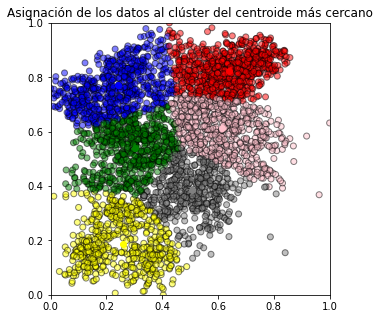

In [21]:
def asignacion(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - c1)^2 - (x2 - c2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['lat'] - centroids[i][0]) ** 2
                + (df['lon'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
 
df = asignacion(df, centroids)
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['lat'], df['lon'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

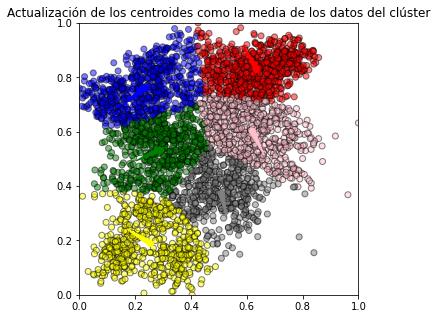

In [22]:
import copy
 
old_centroids = copy.deepcopy(centroids)
 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['lat'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['lon'])
    return k
 
centroids = update(centroids)
     
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['lat'], df['lon'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Actualización de los centroides como la media de los datos del clúster')
plt.xlim(0, 1)
plt.ylim(0, 1)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=.02, head_length=.1, fc=colmap[i], ec=colmap[i])
plt.show()


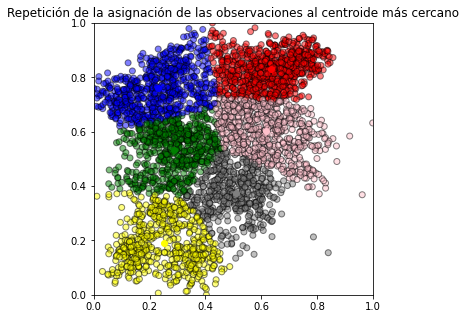

In [23]:
df = asignacion(df, centroids)
 
# Representación de resultados
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['lat'], df['lon'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [24]:
df.drop(['distance_from_1','distance_from_2','distance_from_3','distance_from_4','distance_from_5','distance_from_6'],
        axis=1,inplace=True)
df

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color
0,0.409848,0.453665,5,2.0,1,1,6,grey
1,0.133261,0.407177,1,17.0,2,1,2,green
2,0.550525,0.325364,5,2.0,3,1,6,grey
3,0.309444,0.503118,1,15.0,4,3,2,green
4,0.566835,0.415452,5,2.0,5,1,6,grey
...,...,...,...,...,...,...,...,...
3620,0.713417,0.782084,0,15.0,3621,1,1,red
3621,0.613278,0.742289,0,2.0,3622,1,1,red
3622,0.428017,0.895832,2,6.0,3623,1,1,red
3623,0.452256,0.756962,0,31.0,3624,1,1,red


In [25]:
df.closest.value_counts()

1    743
3    653
5    608
2    601
4    559
6    461
Name: closest, dtype: int64

In [26]:
df[['Vol_Entrega','closest']].groupby('closest').sum()

,Vol_Entrega
closest,
1,8482.000000
2,9749.166667
3,8974.333333
4,7702.666667
5,7455.500000
6,5470.833333


In [27]:
df

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color
0,0.409848,0.453665,5,2.0,1,1,6,grey
1,0.133261,0.407177,1,17.0,2,1,2,green
2,0.550525,0.325364,5,2.0,3,1,6,grey
3,0.309444,0.503118,1,15.0,4,3,2,green
4,0.566835,0.415452,5,2.0,5,1,6,grey
...,...,...,...,...,...,...,...,...
3620,0.713417,0.782084,0,15.0,3621,1,1,red
3621,0.613278,0.742289,0,2.0,3622,1,1,red
3622,0.428017,0.895832,2,6.0,3623,1,1,red
3623,0.452256,0.756962,0,31.0,3624,1,1,red


In [28]:
dias = pd.DataFrame()
dias['Id_Cliente']=df['Id_Cliente']
dias['Frecuencia']=df['Frecuencia']
dias['D1']=dias['D2']=dias['D3']=dias['D4']=dias['D5']=dias['D6']=0
dias['cl']=df['closest']
dias

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,cl
0,1,1,0,0,0,0,0,0,6
1,2,1,0,0,0,0,0,0,2
2,3,1,0,0,0,0,0,0,6
3,4,3,0,0,0,0,0,0,2
4,5,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...
3620,3621,1,0,0,0,0,0,0,1
3621,3622,1,0,0,0,0,0,0,1
3622,3623,1,0,0,0,0,0,0,1
3623,3624,1,0,0,0,0,0,0,1


In [29]:
for j in range(len(dias)):
    for i in range(1,7):
        if dias.iloc[j]['cl']==i:
            dias.iloc[j,i+1]=1

In [30]:
dias

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,cl
0,1,1,0,0,0,0,0,1,6
1,2,1,0,1,0,0,0,0,2
2,3,1,0,0,0,0,0,1,6
3,4,3,0,1,0,0,0,0,2
4,5,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,1
3621,3622,1,1,0,0,0,0,0,1
3622,3623,1,1,0,0,0,0,0,1
3623,3624,1,1,0,0,0,0,0,1


In [31]:
df2=df[df['Frecuencia']>1]
df2

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color
3,0.309444,0.503118,1,15.0,4,3,2,green
12,0.591081,0.830186,0,13.0,13,2,1,red
16,0.486994,0.367607,5,13.5,17,2,6,grey
17,0.602537,0.356000,5,7.0,18,2,6,grey
21,0.572843,0.708237,4,12.0,22,2,5,pink
...,...,...,...,...,...,...,...,...
3542,0.505353,0.425770,5,13.5,3543,2,6,grey
3547,0.647952,0.812866,0,0.5,3548,2,1,red
3574,0.571279,0.879398,0,4.0,3575,2,1,red
3587,0.249831,0.293959,3,17.0,3588,2,4,yellow


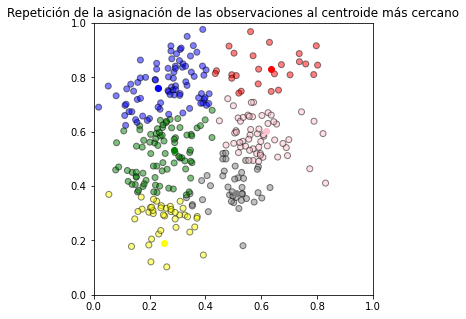

In [32]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['lat'], df2['lon'], color=df2['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

<ipython-input-33-de44f05a8743>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster_{}'.format(i)] = (
<ipython-input-33-de44f05a8743>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['closest2'] = df2.loc[:, centroid_distance_cols].idxmin(axis=1)
<ipython-input-33-de44f05a8743>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

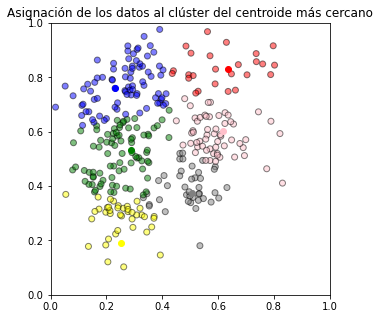

In [33]:
def asignacion(df2, centroids):
    for i in centroids.keys():
        df2['cluster_{}'.format(i)] = (
            np.sqrt(
                (df2['lat'] - centroids[i][0]) ** 2
                + (df2['lon'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['cluster_{}'.format(i) for i in centroids.keys()]
    df2['closest2'] = df2.loc[:, centroid_distance_cols].idxmin(axis=1)
    df2['closest2'] = df2['closest2'].map(lambda x: int(x.lstrip('cluster_{}')))
    df2['color'] = df2['closest2'].map(lambda x: colmap[x])
    return df2
 
df2 = asignacion(df2, centroids)
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['lat'], df2['lon'], color=df2['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [34]:
df2.drop(['closest2'],axis=1,inplace=True)
df2

C:\Users\ICCSC\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
3,0.309444,0.503118,1,15.0,4,3,2,green,0.462553,0.037665,0.270777,0.317548,0.325110,0.236020
12,0.591081,0.830186,0,13.0,13,2,1,red,0.043260,0.423112,0.366019,0.723596,0.228481,0.461722
16,0.486994,0.367607,5,13.5,17,2,6,grey,0.487583,0.259281,0.470314,0.293784,0.270070,0.022857
17,0.602537,0.356000,5,7.0,18,2,6,grey,0.477469,0.361181,0.550374,0.387161,0.247909,0.096351
21,0.572843,0.708237,4,12.0,22,2,5,pink,0.138544,0.333252,0.345720,0.608672,0.114448,0.338503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,0.505353,0.425770,5,13.5,3543,2,6,grey,0.426592,0.242547,0.434022,0.345278,0.210701,0.049906
3547,0.647952,0.812866,0,0.5,3548,2,1,red,0.023851,0.454674,0.419605,0.737222,0.211517,0.458700
3574,0.571279,0.879398,0,4.0,3575,2,1,red,0.078595,0.446054,0.359459,0.758902,0.280062,0.507376
3587,0.249831,0.293959,3,17.0,3588,2,4,yellow,0.661616,0.243560,0.468806,0.103260,0.481468,0.271137


In [35]:
df3=df2
for i in range(len(df3)):
    d=pd.DataFrame(df3.iloc[i,8:14].sort_values().reset_index())
    d.set_index('index',inplace=True)
    d=d.T
    d.iloc[0][0]=1
    da=pd.DataFrame()
    da['cluster_1']=d['cluster_1']
    da['cluster_2']=d['cluster_2']
    da['cluster_3']=d['cluster_3']
    da['cluster_4']=d['cluster_4']
    da['cluster_5']=d['cluster_5']
    da['cluster_6']=d['cluster_6']
    for j in range(6):
       df3.iloc[i,(j+8)]=da.iloc[0,j]

C:\Users\ICCSC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
def asignacion(df2, centroids):
    centroid_distance_cols = ['cluster_{}'.format(i) for i in centroids.keys()]
    df2['closest2'] = df2.loc[:, centroid_distance_cols].idxmin(axis=1)
    df2['closest2'] = df2['closest2'].map(lambda x: int(x.lstrip('cluster_{}')))
    df2['color'] = df2['closest2'].map(lambda x: colmap[x])
    return df2
asignacion(df3, centroids)

<ipython-input-36-609ebfc05b92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['closest2'] = df2.loc[:, centroid_distance_cols].idxmin(axis=1)
<ipython-input-36-609ebfc05b92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['closest2'] = df2['closest2'].map(lambda x: int(x.lstrip('cluster_{}')))
<ipython-input-36-609ebfc05b92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,closest2
3,0.309444,0.503118,1,15.0,4,3,2,grey,0.462553,1.000000,0.270777,0.317548,0.325110,0.236020,6
12,0.591081,0.830186,0,13.0,13,2,1,pink,1.000000,0.423112,0.366019,0.723596,0.228481,0.461722,5
16,0.486994,0.367607,5,13.5,17,2,6,green,0.487583,0.259281,0.470314,0.293784,0.270070,1.000000,2
17,0.602537,0.356000,5,7.0,18,2,6,pink,0.477469,0.361181,0.550374,0.387161,0.247909,1.000000,5
21,0.572843,0.708237,4,12.0,22,2,5,red,0.138544,0.333252,0.345720,0.608672,1.000000,0.338503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,0.505353,0.425770,5,13.5,3543,2,6,pink,0.426592,0.242547,0.434022,0.345278,0.210701,1.000000,5
3547,0.647952,0.812866,0,0.5,3548,2,1,pink,1.000000,0.454674,0.419605,0.737222,0.211517,0.458700,5
3574,0.571279,0.879398,0,4.0,3575,2,1,pink,1.000000,0.446054,0.359459,0.758902,0.280062,0.507376,5
3587,0.249831,0.293959,3,17.0,3588,2,4,green,0.661616,0.243560,0.468806,1.000000,0.481468,0.271137,2


In [37]:
di=dias.merge(df3[['Id_Cliente','closest2']],on='Id_Cliente',how='left')
di

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,cl,closest2
0,1,1,0,0,0,0,0,1,6,NaN
1,2,1,0,1,0,0,0,0,2,NaN
2,3,1,0,0,0,0,0,1,6,NaN
3,4,3,0,1,0,0,0,0,2,6.0
4,5,1,0,0,0,0,0,1,6,NaN
...,...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,1,NaN
3621,3622,1,1,0,0,0,0,0,1,NaN
3622,3623,1,1,0,0,0,0,0,1,NaN
3623,3624,1,1,0,0,0,0,0,1,NaN


In [38]:
di.drop(['cl' ],axis=1,inplace=True)
di

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,closest2
0,1,1,0,0,0,0,0,1,NaN
1,2,1,0,1,0,0,0,0,NaN
2,3,1,0,0,0,0,0,1,NaN
3,4,3,0,1,0,0,0,0,6.0
4,5,1,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,NaN
3621,3622,1,1,0,0,0,0,0,NaN
3622,3623,1,1,0,0,0,0,0,NaN
3623,3624,1,1,0,0,0,0,0,NaN


In [39]:
for j in range(len(di)):
    for i in range(1,7):
        if di.iloc[j]['closest2']==i:
            di.iloc[j,i+1]=1
di

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,closest2
0,1,1,0,0,0,0,0,1,NaN
1,2,1,0,1,0,0,0,0,NaN
2,3,1,0,0,0,0,0,1,NaN
3,4,3,0,1,0,0,0,1,6.0
4,5,1,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,NaN
3621,3622,1,1,0,0,0,0,0,NaN
3622,3623,1,1,0,0,0,0,0,NaN
3623,3624,1,1,0,0,0,0,0,NaN


In [40]:
di.drop(['closest2' ],axis=1,inplace=True)

In [41]:
df33=df3[df3['Frecuencia']>2]
df33

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,closest2
3,0.309444,0.503118,1,15.000000,4,3,2,grey,0.462553,1.000000,0.270777,0.317548,0.325110,0.236020,6
26,0.175484,0.657562,2,18.333333,27,3,3,green,0.490988,0.167141,1.000000,0.473129,0.446522,0.435953,2
45,0.560435,0.587913,4,9.333333,46,3,5,grey,0.255409,0.277138,0.372445,0.502618,1.000000,0.218287,6
55,0.136845,0.673566,2,18.333333,56,3,3,green,0.522185,0.205817,1.000000,0.496476,0.486947,0.475957,2
56,0.351482,0.584920,1,21.666667,57,3,2,blue,0.375804,1.000000,0.214293,0.406445,0.267862,0.261251,3
57,0.259643,0.633588,1,14.333333,58,3,2,blue,0.424131,1.000000,0.131876,0.442915,0.360333,0.358043,3
64,0.267999,0.801898,2,17.000000,65,3,3,green,0.367553,0.268255,1.000000,0.611365,0.402995,0.489044,2
101,0.509970,0.603890,4,10.000000,102,3,5,grey,0.260146,0.232101,0.320517,0.486859,1.000000,0.227947,6
109,0.292984,0.577914,1,18.333333,110,3,2,blue,0.425740,1.000000,0.194498,0.389302,0.326718,0.295194,3
110,0.155244,0.634541,2,14.000000,111,3,3,green,0.518297,0.166678,1.000000,0.454325,0.464510,0.437607,2


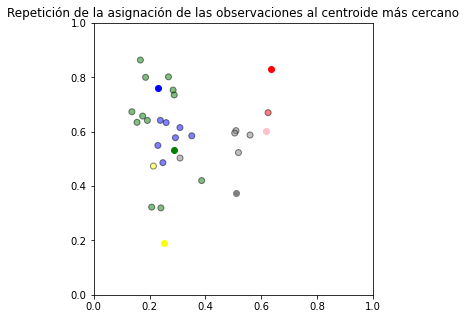

In [42]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df33['lat'], df33['lon'], color=df33['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

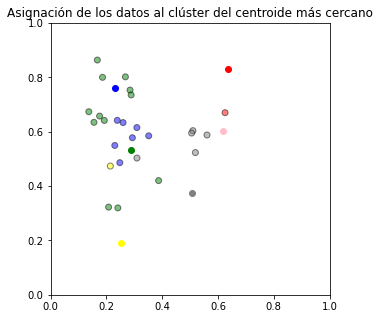

In [43]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df33['lat'], df33['lon'], color=df33['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [44]:
df4=df33
for i in range(len(df4)):
    #print(i,j+3)
    d=pd.DataFrame(df4.iloc[i,8:14].sort_values().reset_index())
    d.set_index('index',inplace=True)
    d=d.T
    d.iloc[0][0]=1
    da=pd.DataFrame()
    da['cluster_1']=d['cluster_1']
    da['cluster_2']=d['cluster_2']
    da['cluster_3']=d['cluster_3']
    da['cluster_4']=d['cluster_4']
    da['cluster_5']=d['cluster_5']
    da['cluster_6']=d['cluster_6']
    #print(da)
    for j in range(6):
       df4.iloc[i,(j+8)]=da.iloc[0,j]

C:\Users\ICCSC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
def asignacion(df4, centroids):
    centroid_distance_cols = ['cluster_{}'.format(i) for i in centroids.keys()]
    df4['closest2'] = df4.loc[:, centroid_distance_cols].idxmin(axis=1)
    df4['closest2'] = df4['closest2'].map(lambda x: int(x.lstrip('cluster_{}')))
    df4['color'] = df4['closest2'].map(lambda x: colmap[x])
    return df4
asignacion(df4, centroids)

<ipython-input-45-a7701cec3a9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['closest2'] = df4.loc[:, centroid_distance_cols].idxmin(axis=1)
<ipython-input-45-a7701cec3a9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['closest2'] = df4['closest2'].map(lambda x: int(x.lstrip('cluster_{}')))
<ipython-input-45-a7701cec3a9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,lat,lon,cl,Vol_Entrega,Id_Cliente,Frecuencia,closest,color,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,closest2
3,0.309444,0.503118,1,15.000000,4,3,2,blue,0.462553,1.000000,0.270777,0.317548,0.325110,1.000000,3
26,0.175484,0.657562,2,18.333333,27,3,3,grey,0.490988,1.000000,1.000000,0.473129,0.446522,0.435953,6
45,0.560435,0.587913,4,9.333333,46,3,5,red,0.255409,0.277138,0.372445,0.502618,1.000000,1.000000,1
55,0.136845,0.673566,2,18.333333,56,3,3,grey,0.522185,1.000000,1.000000,0.496476,0.486947,0.475957,6
56,0.351482,0.584920,1,21.666667,57,3,2,grey,0.375804,1.000000,1.000000,0.406445,0.267862,0.261251,6
57,0.259643,0.633588,1,14.333333,58,3,2,grey,0.424131,1.000000,1.000000,0.442915,0.360333,0.358043,6
64,0.267999,0.801898,2,17.000000,65,3,3,red,0.367553,1.000000,1.000000,0.611365,0.402995,0.489044,1
101,0.509970,0.603890,4,10.000000,102,3,5,green,0.260146,0.232101,0.320517,0.486859,1.000000,1.000000,2
109,0.292984,0.577914,1,18.333333,110,3,2,grey,0.425740,1.000000,1.000000,0.389302,0.326718,0.295194,6
110,0.155244,0.634541,2,14.000000,111,3,3,grey,0.518297,1.000000,1.000000,0.454325,0.464510,0.437607,6


In [46]:
dia=di.merge(df4[['Id_Cliente','closest2']],on='Id_Cliente',how='left')
dia

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,closest2
0,1,1,0,0,0,0,0,1,NaN
1,2,1,0,1,0,0,0,0,NaN
2,3,1,0,0,0,0,0,1,NaN
3,4,3,0,1,0,0,0,1,3.0
4,5,1,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,NaN
3621,3622,1,1,0,0,0,0,0,NaN
3622,3623,1,1,0,0,0,0,0,NaN
3623,3624,1,1,0,0,0,0,0,NaN


In [47]:
for j in range(len(dia)):
    for i in range(1,7):
        if dia.iloc[j]['closest2']==i:
            dia.iloc[j,i+1]=1
dia

,Id_Cliente,Frecuencia,D1,D2,D3,D4,D5,D6,closest2
0,1,1,0,0,0,0,0,1,NaN
1,2,1,0,1,0,0,0,0,NaN
2,3,1,0,0,0,0,0,1,NaN
3,4,3,0,1,1,0,0,1,3.0
4,5,1,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...
3620,3621,1,1,0,0,0,0,0,NaN
3621,3622,1,1,0,0,0,0,0,NaN
3622,3623,1,1,0,0,0,0,0,NaN
3623,3624,1,1,0,0,0,0,0,NaN


In [48]:
dia.drop(['Frecuencia','closest2'],axis=1,inplace=True)
dia

,Id_Cliente,D1,D2,D3,D4,D5,D6
0,1,0,0,0,0,0,1
1,2,0,1,0,0,0,0
2,3,0,0,0,0,0,1
3,4,0,1,1,0,0,1
4,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...
3620,3621,1,0,0,0,0,0
3621,3622,1,0,0,0,0,0
3622,3623,1,0,0,0,0,0
3623,3624,1,0,0,0,0,0


In [49]:
dia.to_csv('ActuaPyG.csv', index=False)

In [51]:
m=[]
col=['D1', 'D2', 'D3', 'D4', 'D5', 'D6']
for i in dia[col]:
    m.append(dia[i].sum())
m.append(sum(m))

In [52]:
d=dia.merge(df[['Id_Cliente','Vol_Entrega']],on='Id_Cliente',how='left')

In [53]:
d['D1E']=d['D1']*d['Vol_Entrega']
d['D2E']=d['D2']*d['Vol_Entrega']
d['D3E']=d['D3']*d['Vol_Entrega']
d['D4E']=d['D4']*d['Vol_Entrega']
d['D5E']=d['D5']*d['Vol_Entrega']
d['D6E']=d['D6']*d['Vol_Entrega']

In [54]:
n=[]
col=['D1E', 'D2E', 'D3E', 'D4E', 'D5E', 'D6E']
for i in d[col]:
    n.append(d[i].sum())
n.append(sum(n))

In [55]:
res=pd.DataFrame()
res['Day']=['Zona1', 'Zona2', 'Zona3', 'Zona4', 'Zona5', 'Zona6','Total']
res['Balanceado en Clientes']=m
res['Balanceado en Volumen']=n
res['Distancia KM mínima']=str('No aplica')
res

,Day,Balanceado en Clientes,Balanceado en Volumen,Distancia KM mínima
0,Zona1,787,9222.166667,No aplica
1,Zona2,706,11957.000000,No aplica
2,Zona3,699,9862.000000,No aplica
3,Zona4,592,8306.166667,No aplica
4,Zona5,656,8262.666667,No aplica
5,Zona6,537,6790.000000,No aplica
6,Total,3977,54400.000000,No aplica
